In [ ]:
import numpy as np 
import pandas as pd 
import warnings 
warnings.filterwarnings('ignore') 
from sklearn.linear_model import LinearRegression 
from matplotlib import pyplot as plt 
%matplotlib inline 
import sklearn 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn import preprocessing

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving weatherHistory.csv to weatherHistory.csv


#**Data Collected from this Source  -->   https://www.kaggle.com/budincsevity/szeged-weather**

In [ ]:
weather_df = pd.read_csv('weatherHistory.csv')  
weather_df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
weather_df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [ ]:
weather_df.shape

(96453, 12)

In [ ]:
weather_df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [ ]:
print(weather_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB
None


In [ ]:
weather_df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [ ]:
weather_df = weather_df.dropna()

In [ ]:
weather_df.drop(['Loud Cover'], axis=1, inplace=True)

In [ ]:
weather_df.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [ ]:
weather_df_num = weather_df[list(weather_df.dtypes[weather_df.dtypes != 'object'].index)]

In [ ]:
weather_df_num.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [ ]:
weather_df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95936 entries, 0 to 96452
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Temperature (C)           95936 non-null  float64
 1   Apparent Temperature (C)  95936 non-null  float64
 2   Humidity                  95936 non-null  float64
 3   Wind Speed (km/h)         95936 non-null  float64
 4   Wind Bearing (degrees)    95936 non-null  float64
 5   Visibility (km)           95936 non-null  float64
 6   Pressure (millibars)      95936 non-null  float64
dtypes: float64(7)
memory usage: 5.9 MB


In [ ]:
weather_y = weather_df_num.pop('Temperature (C)')   # Target Variable / Dependent Variable
weather_x = weather_df_num   # Independent Variable

In [ ]:
weather_y.head()

0    9.472222
1    9.355556
2    9.377778
3    8.288889
4    8.755556
Name: Temperature (C), dtype: float64

In [ ]:
weather_x.head()

,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,6.977778,0.83,11.0446,259.0,15.8263,1016.51


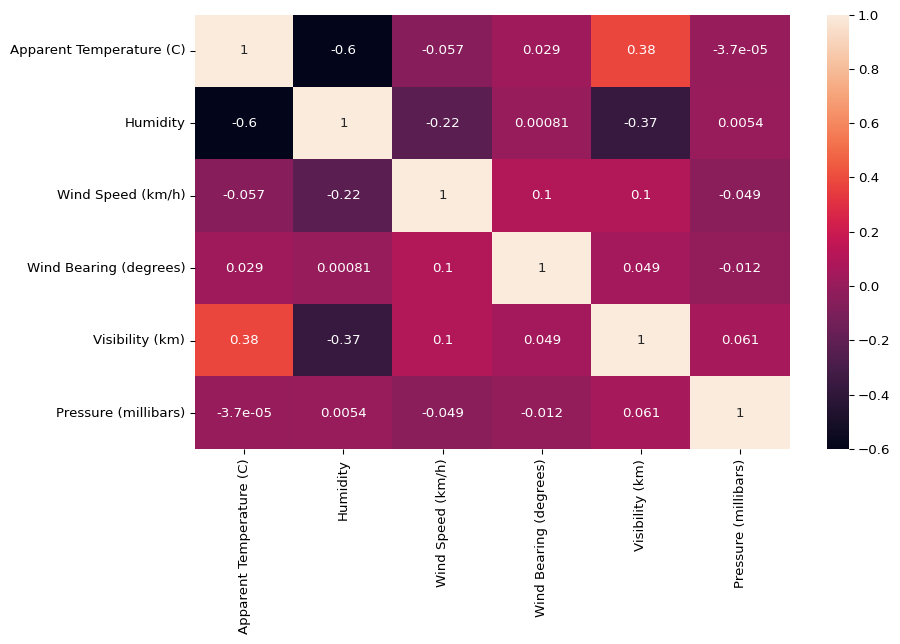

In [ ]:
import seaborn as sns
corr_df = weather_x.iloc[:, :].corr()
plt.figure(figsize = (10, 6), dpi = 96)
sns.heatmap(data = corr_df, annot = True) # 'annot=True' fills the R values in the heatmap cells.
plt.show()

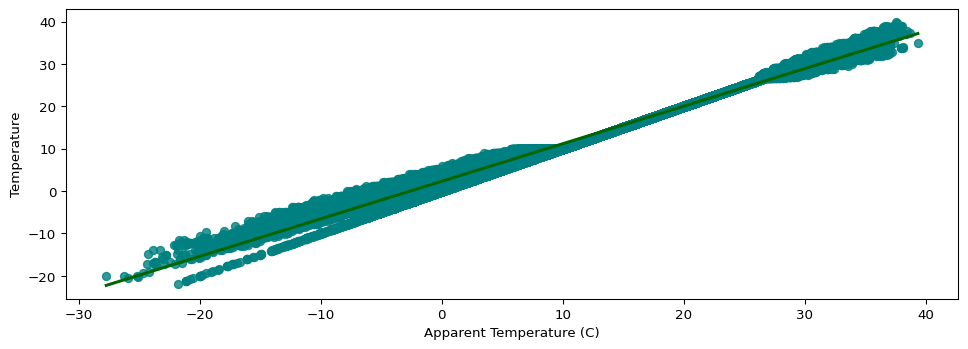

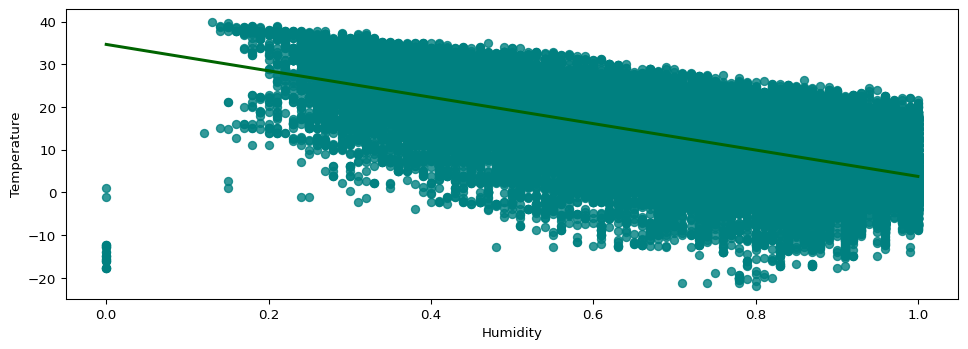

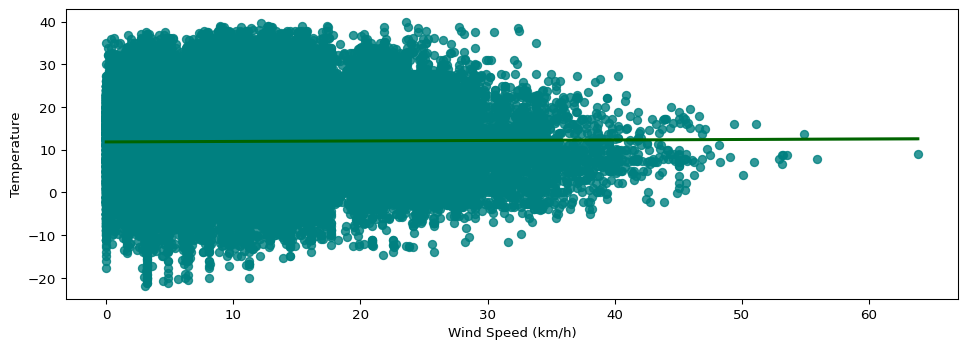

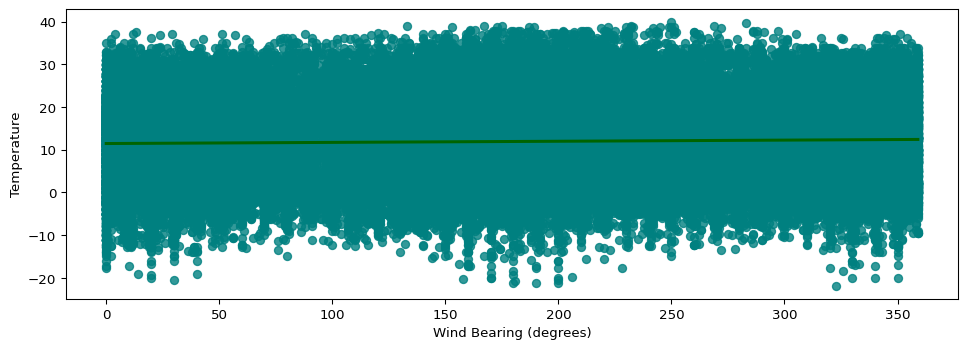

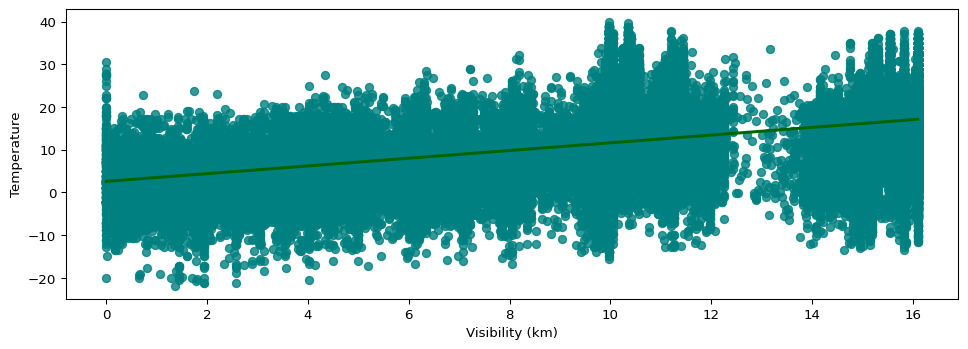

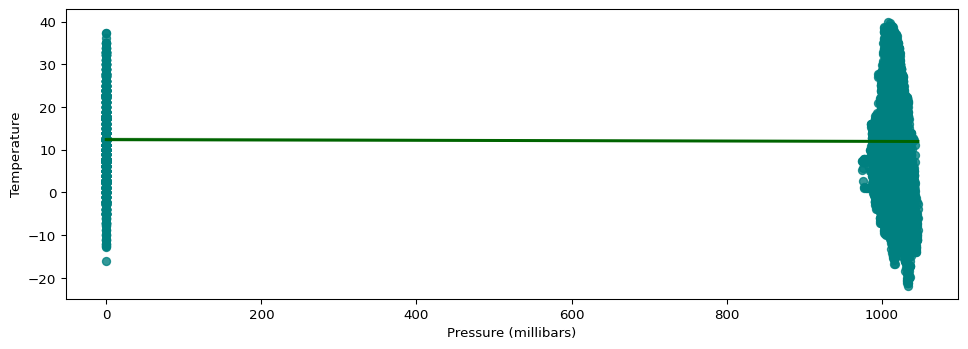

In [ ]:
for col in weather_x:
  plt.figure(figsize = (12, 4), dpi = 96)
  sns.regplot(x = col, y = weather_y, data = weather_x, color = 'teal', line_kws={"color": "darkgreen"})
  plt.xlabel(col)
  plt.ylabel("Temperature")
  plt.show()

In [ ]:
train_x,test_x,train_y,test_y = train_test_split(weather_x,weather_y,test_size = 0.2, random_state=4)

In [ ]:
train_x.head()

,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
75045,12.105556,0.93,3.0107,38.0,8.4203,1015.82
92784,5.094444,1.00,11.3988,191.0,0.7406,1007.87
17359,11.005556,0.78,3.2200,280.0,9.9015,1015.71
69555,11.688889,0.83,11.2217,269.0,16.0517,1016.81
73652,3.894444,0.80,19.9318,140.0,15.6009,1016.91


In [ ]:
train_y.head()

75045    12.105556
92784     7.244444
17359    11.005556
69555    11.688889
73652     7.222222
Name: Temperature (C), dtype: float64

In [ ]:
y_train_reshaped = train_y.values.reshape(-1,1)  # Converting 1-dimension to 2-dimension
y_test_reshaped = test_y.values.reshape(-1,1)

#Model Building with Multiple Linear Regression

In [ ]:
model_1 = LinearRegression()
model_1.fit(train_x,y_train_reshaped)

LinearRegression()

In [ ]:
y_train_pred = model_1.predict(train_x)
y_test_pred = model_1.predict(test_x)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
print(f"Train set\n{'-'*50}")
print(f"R-squared : {r2_score(y_train_reshaped,y_train_pred):.2f}\n")
print(f"Test set\n{'-'*50}")
print(f"R-squared : {r2_score(y_test_reshaped,y_test_pred):.2f}")

Train set
--------------------------------------------------
R-squared : 0.99

Test set
--------------------------------------------------
R-squared : 0.99


In [ ]:
error = np.mean((y_test_pred-y_test_reshaped)**2)
print(f"Model Error is {error:.3f}")
print(f"Model Error is {round(np.mean((y_test_pred-y_test_reshaped)**2),3) * 100} %")

Model Error is 0.884
Model Error is 88.4 %


In [ ]:
model_efficiency = 100 - np.mean((y_test_pred-y_test_reshaped)**2)*100
print(f"Model Efficiency is  {model_efficiency:.3f} %")

Model Efficiency is  11.599 %


In [ ]:
y_test_pred[:5]

array([[ 7.18644913],
       [14.01906027],
       [ 3.10652979],
       [22.69334058],
       [21.02934179]])

In [ ]:
test_pred_flat_array = np.ravel(y_test_pred) # converted 2 dimensional array into 1 dimensional array
test_pred_flat_array[:5]

array([ 7.18644913, 14.01906027,  3.10652979, 22.69334058, 21.02934179])

In [ ]:
pd.DataFrame({'Actual_Value' : test_y,
              'Prediction' : test_pred_flat_array,
              'Differences' : (test_y - test_pred_flat_array)})

,Actual_Value,Prediction,Differences
16637,7.827778,7.186449,0.641329
15946,12.244444,14.019060,-1.774616
73161,3.777778,3.106530,0.671248
88760,22.027778,22.693341,-0.665563
43259,21.638889,21.029342,0.609547
...,...,...,...
27433,13.333333,13.529784,-0.196451
73256,7.688889,7.350417,0.338472
25876,14.194444,14.498430,-0.303985
91002,1.183333,1.117048,0.066286


#Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree=4)
x_poly = poly.fit_transform(train_x)

In [ ]:
poly.fit(x_poly,train_y)
lin2 = LinearRegression()
lin2.fit(x_poly,train_y)

LinearRegression()

In [ ]:
model_fitted = poly.fit_transform(test_x)

In [ ]:
y_test_pred_2 = lin2.predict(model_fitted)
y_test_pred_2[:5]

array([ 7.30167588, 13.06595188,  3.74107658, 21.62556045, 21.50189154])

In [ ]:
error_2 = np.mean((y_test_pred_2-test_y)**2)
print(f"Model Error is {error_2:.3f}")
print(f"Model Error is {round(np.mean((y_test_pred_2-test_y)**2),3) * 100} %")

Model Error is 0.141
Model Error is 14.099999999999998 %


In [ ]:
model_efficiency = 100 - round(error_2*100,3)
print(f"Model Efficiency is  {model_efficiency:.3f} %")

Model Efficiency is  85.915 %


In [ ]:
test_pred_flat_array2 = np.ravel(y_test_pred_2) # converted 2 dimensional array into 1 dimensional array
test_pred_flat_array2[:5]

array([ 7.30167588, 13.06595188,  3.74107658, 21.62556045, 21.50189154])

In [ ]:
pd.DataFrame({'Actual_Value' : test_y,
              'Prediction' : test_pred_flat_array2,
              'Differences' : (test_y - test_pred_flat_array2)})

,Actual_Value,Prediction,Differences
16637,7.827778,7.301676,0.526102
15946,12.244444,13.065952,-0.821507
73161,3.777778,3.741077,0.036701
88760,22.027778,21.625560,0.402217
43259,21.638889,21.501892,0.136997
...,...,...,...
27433,13.333333,13.660906,-0.327572
73256,7.688889,7.358736,0.330153
25876,14.194444,14.291945,-0.097501
91002,1.183333,0.801154,0.382179


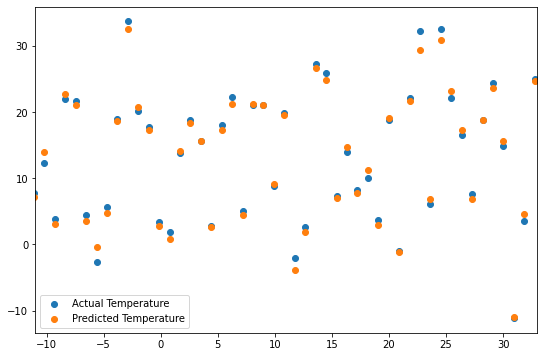

In [ ]:
x_axis = np.linspace(min(test_y[:50]),max(test_y[:50]))
plt.figure(figsize=(9,6))
plt.scatter(x_axis, test_y[:50], label= 'Actual Temperature')
plt.scatter(x_axis, test_pred_flat_array[:50], label= 'Predicted Temperature')
plt.xlim(int(min(test_y[:50])),int(max(test_y[:50])))
plt.legend()
plt.show()

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(train_x, train_y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [ ]:
y_test_pred_3 = regressor.predict(test_x)

In [ ]:
error_3 = np.mean((y_test_pred_3-test_y)**2)
print(f"Model Error is {error_3:.3f}")
print(f"Model Error is {round(np.mean((y_test_pred_3-test_y)**2),3) * 100} %")

Model Error is 0.003
Model Error is 0.3 %


In [ ]:
model_efficiency = 100 - round(np.mean((y_test_pred_3-test_y)**2)*100,3)
print(f"Model Efficiency is   {model_efficiency} %")

Model Efficiency is   99.729 %


In [ ]:
test_pred_flat_array3 = np.ravel(y_test_pred_3) # converted 2 dimensional array into 1 dimensional array
test_pred_flat_array3[:5]

array([ 7.81166667, 12.24444444,  3.75944444, 22.02833333, 21.64166667])

In [ ]:
pd.DataFrame({'Actual_Value' : test_y,
              'Prediction' : test_pred_flat_array3,
              'Differences' : (test_y - test_pred_flat_array3)})

,Actual_Value,Prediction,Differences
16637,7.827778,7.811667,1.611111e-02
15946,12.244444,12.244444,0.000000e+00
73161,3.777778,3.759444,1.833333e-02
88760,22.027778,22.028333,-5.555556e-04
43259,21.638889,21.641667,-2.777778e-03
...,...,...,...
27433,13.333333,13.333333,0.000000e+00
73256,7.688889,7.686667,2.222222e-03
25876,14.194444,14.194444,1.776357e-15
91002,1.183333,1.181667,1.666667e-03


In [ ]:
actual_data = test_y[:50]
pred_data = pd.Series(test_pred_flat_array3[:50])

In [ ]:
list_of_tuples = list(zip(actual_data, pred_data)) 
df_temp = pd.DataFrame(list_of_tuples, columns = ['Actual_Temp', 'Pred_Temp'])
df_temp.head()

,Actual_Temp,Pred_Temp
0,7.827778,7.811667
1,12.244444,12.244444
2,3.777778,3.759444
3,22.027778,22.028333
4,21.638889,21.641667


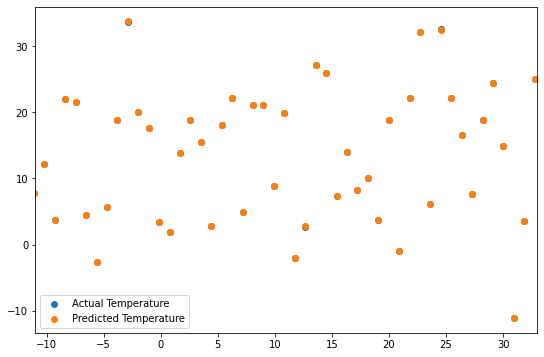

In [ ]:
x_axis = np.linspace(min(actual_data),max(actual_data))
plt.figure(figsize=(9,6))
plt.scatter(x_axis, df_temp['Actual_Temp'], label= 'Actual Temperature')
plt.scatter(x_axis, df_temp['Pred_Temp'], label= 'Predicted Temperature')
plt.xlim(int(min(actual_data)),int(max(actual_data)))
plt.legend()
plt.show()